### Найти все интересные инсайты в данных
Аномалии:
- Товары выбраны (total_quantity > 0), применен промокод, а item_total = 0
- Скидка по промокоду больше стоимости корзины (item_total)
- Поля, где total_weight = 0, total_quantity = 0, а item_total <> 0. Цена за пустую корзину
- Поля, где total_weight = 0, а total_quantity <> 0. Ошибка в измерении веса товаров
- Поля, где total_quantity <> 0, а item_total = 0. Вес указан, а стоимость товаров в корзине - нет
- Поля, где created_at > shipped_at. Заказ не может быть создан позднее того, как был доставлен
- Поля, где доставка > 10 часов. По моему мнению, доставка должна быть оперативной и, возможно, занимать около 2ч. Но не 10 или 11.


### Зависимости, корреляции:
- Топ городов по заменяемым и отмененным товарам.
- Связь между суммой заказа и кол-вом заменяемых товаров
- Изучить влияние промокода на возвраты товаров, отмены, на сумму заказа
- Изучить влияние длительности доставки на отмену заказа
- Изучить влияние длительности доставки на возврат товаров
- Изучить влияние длительности доставки на сумму следующих заказов среди тех, кто совершил хотя бы 1 повторный заказ
- Средние чеки на пользователя по городам. Влияние длительности доставки на отток клиентов


In [ ]:
import pandas as pd
from sqlalchemy import create_engine

postgres_host = '_'
port = '6432'
database= 'hr-analytics'
user='analytics'
password = '_'

engine = create_engine(
    f'postgresql://{user}:{password}@{postgres_host}:{port}/{database}?sslmode=require'
)

## Аномалии в данных

Orders:
- товары выбраны (total_quantity > 0), применен промокод, а item_total = 0

In [ ]:
sql = """
    SELECT *
    FROM orders
    WHERE promo_total <> 0 AND item_total = 0
"""
df = pd.read_sql(sql, engine)
df

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
0,5126949,1758530,98.0,249.0,0,-199.0,10950,11,shipped,2019-12-11 05:46:06,2019-12-10 20:02:23,6751812,12,943952


Orders:
- скидка по промокоду больше стоимости корзины (item_total)

In [ ]:
sql = """
    SELECT *
    FROM orders
    WHERE abs(promo_total) > item_total
"""
df = pd.read_sql(sql, engine)
df.head()

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
0,757238,60713,299.0,299.0,441,-500.0,8063,14,shipped,2018-08-27 20:02:04,2018-08-26 09:01:11,872599,1,227253
1,766601,142290,0.0,0.0,92,-500.0,10930,15,shipped,2018-09-03 21:14:22,2018-08-30 19:40:29,905771,1,233265
2,774026,144172,0.0,0.0,16,-100.0,2016,2,shipped,2018-09-05 19:22:20,2018-09-04 08:36:45,917813,1,234916
3,775137,144466,0.0,0.0,385,-500.0,7370,20,shipped,2018-09-05 20:08:15,2018-09-04 20:10:48,919426,1,234919
4,785709,88605,299.0,299.0,2489,-3000.0,17735,26,shipped,2018-09-11 07:47:46,2018-09-10 15:16:17,496581,1,239868


Orders:
- поля где total_weight = 0, total_quantity = 0, а item_total <> 0

In [ ]:
sql = """
    SELECT *
    FROM orders
    WHERE total_weight = 0 AND total_quantity = 0 AND item_total <> 0
"""
df = pd.read_sql(sql, engine)
df.head()

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
0,2448854,416726,0.0,0.0,828,0.0,0,0,shipped,2019-09-24 10:47:04,2019-09-23 15:44:52,3502543,1,732746
1,3647822,1356962,299.0,299.0,419,0.0,0,0,shipped,2019-11-09 17:09:15,2019-11-06 16:32:52,5016159,1,846421
2,840797,162644,0.0,0.0,710,0.0,0,0,shipped,2018-10-11 06:21:01,2018-10-08 18:25:38,1036194,3,272184
3,3716542,1226832,158.0,199.0,1116,0.0,0,0,shipped,2019-11-08 17:54:58,2019-11-07 14:41:16,4515332,1,843901
4,854444,166452,0.0,0.0,547,0.0,0,0,shipped,2018-10-17 13:26:05,2018-10-16 08:10:21,1060262,3,270393


Orders:
- поля где total_weight = 0, а total_quantity <> 0

In [ ]:
sql = """
    SELECT *
    FROM orders
    WHERE total_weight = 0 AND total_quantity <> 0
"""
df = pd.read_sql(sql, engine)
df.head()

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
0,772241,142609,0.0,0.0,4243,0.0,0,1,shipped,2018-09-04 16:32:18,2018-09-03 07:13:32,907928,1,234086
1,829404,159337,0.0,0.0,1230,0.0,0,1,shipped,2018-10-03 11:45:53,2018-10-03 06:55:24,1017171,1,258211
2,848467,164776,0.0,0.0,1638,-300.0,0,2,shipped,2018-10-13 08:32:47,2018-10-13 06:24:08,1049645,1,266769
3,867576,170085,0.0,299.0,2657,0.0,0,1,shipped,2018-10-24 16:44:35,2018-10-23 05:25:47,1081489,1,276525
4,872310,167775,199.0,199.0,22674,0.0,0,50,shipped,2018-10-25 20:40:59,2018-10-25 11:06:25,1067987,1,277558


Orders:
- поля где total_quantity <> 0, а item_total = 0 

In [ ]:
sql = """
    SELECT *
    FROM orders
    WHERE total_quantity <> 0 AND item_total = 0
"""
df = pd.read_sql(sql, engine)
df.head()

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
0,2457003,777240,0.0,0.0,0,0.0,500,4,shipped,2019-09-24 13:33:58,2019-09-24 10:10:43,3520882,1,732756
1,2828415,1112015,0.0,299.0,0,0.0,4625,13,shipped,2019-10-20 10:04:05,2019-10-18 20:58:03,4082440,2,796140
2,881444,173854,0.0,299.0,0,0.0,705,3,shipped,2018-10-30 05:50:49,2018-10-29 16:01:04,1104838,14,282229
3,1631533,416183,0.0,299.0,0,0.0,18000,18,shipped,2019-06-21 14:17:06,2019-06-21 09:52:24,2213321,3,561538
4,5126949,1758530,98.0,249.0,0,-199.0,10950,11,shipped,2019-12-11 05:46:06,2019-12-10 20:02:23,6751812,12,943952


Orders:
- поля где created_at > shipped_at

In [ ]:
sql = """
    SELECT *
    FROM orders
    WHERE created_at > shipped_at
"""
df = pd.read_sql(sql, engine)
df

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
0,980548,202199,0.0,199.0,2902,-500.0,3325,11,shipped,2018-12-08 10:27:52,2018-12-11 10:24:44,1275667,18,330168
1,980564,202201,0.0,199.0,2016,-500.0,2850,8,shipped,2018-12-08 10:32:40,2018-12-11 10:30:02,1275696,18,330167
2,980590,202207,0.0,199.0,2237,-500.0,6600,12,shipped,2018-12-08 10:41:15,2018-12-11 10:38:50,1275724,18,330167


- поля, где доставка > 10 часов, считаю аномалией, потому что миссия сбермаркета - экономить время людей, соответственно, доставка должна быть оперативной


In [ ]:
sql = """
    SELECT dw.*, AGE(ends_at, starts_at) as difference
    FROM orders o
    INNER JOIN delivery_windows dw
      ON dw.id = o.delivery_window_id
    WHERE date_part('hour', AGE(ends_at, starts_at)) >= 11
    LIMIT 10
"""
df = pd.read_sql(sql, engine)
df

,store_id,id,starts_at,ends_at,time_zone,difference
0,63,574397,2019-06-28 08:00:00,2019-06-28 19:00:00,Europe/Moscow,0 days 11:00:00
1,62,580981,2019-07-02 08:00:00,2019-07-02 19:00:00,Europe/Moscow,0 days 11:00:00
2,62,582554,2019-07-03 08:00:00,2019-07-03 19:00:00,Europe/Moscow,0 days 11:00:00
3,63,585743,2019-07-05 08:00:00,2019-07-05 19:00:00,Europe/Moscow,0 days 11:00:00
4,63,623066,2019-07-27 08:00:00,2019-07-27 19:00:00,Europe/Moscow,0 days 11:00:00
5,63,635916,2019-08-03 08:00:00,2019-08-03 19:00:00,Europe/Moscow,0 days 11:00:00
6,63,646744,2019-08-09 08:00:00,2019-08-09 19:00:00,Europe/Moscow,0 days 11:00:00
7,63,650377,2019-08-11 08:00:00,2019-08-11 19:00:00,Europe/Moscow,0 days 11:00:00
8,63,656577,2019-08-14 08:00:00,2019-08-14 19:00:00,Europe/Moscow,0 days 11:00:00
9,63,661274,2019-08-17 08:00:00,2019-08-17 19:00:00,Europe/Moscow,0 days 11:00:00


## Зависимости

- Топ городов по заменяемым и отменяемым товарам.
- Связь между суммой заказа и кол-вом заменяемых товаров
- Изучить влияние промокода на возвраты товаров, отмены, на сумму заказа
- Изучить влияние длительности доставки на отмену заказа
- Изучить влияние длительности доставки на возврат товаров
- Изучить влияние длительности доставки на сумму следующих заказов среди тех, кто совершил хотя бы 1 повторный заказ
- Средние чеки на пользователя по городам. Влияние длительности доставки на отток клиентов

- **Топ городов по заменяемым и отменяемым товарам**



In [ ]:
#доля заказов с возвратами по городам

sql = """
WITH orders_per_city AS (
    SELECT 
        city,
        COUNT(o.id) as total_orders
    FROM 
        orders o 
        INNER JOIN stores s 
            ON o.store_id = s.id 
    GROUP BY city
)

SELECT 
    s.city,
    COUNT(DISTINCT order_id) as orders_w_replacement,
    total_orders,
    (COUNT(DISTINCT order_id)/(total_orders)::float)*100 as share
FROM
    replacements r 
    INNER JOIN orders o 
        ON o.id = r.order_id
    INNER JOIN stores s 
        ON o.store_id = s.id
    INNER JOIN orders_per_city 
        USING(city)
GROUP BY
    city, total_orders
ORDER BY
    share DESC
"""
df = pd.read_sql(sql, engine)
df

,city,orders_w_replacement,total_orders,share
0,13,12727,20576,61.853616
1,8,16997,28677,59.270496
2,2,23374,39784,58.752262
3,1,276842,478861,57.812601
4,5,16930,29386,57.612469
5,7,43684,76360,57.207962
6,10,24139,46789,51.591186


`Из таблицы можно оценить долю заказов с возвратами по городам. Добавив информацию о стоимости товаров, можно посмотреть, сколько денег теряет сбермаркет, и определить, в каких городах стоит исправлять ситуацию в первую очередь.`

Text(0.5, 1.0, 'Histogram of Share of Orders with Replacements')

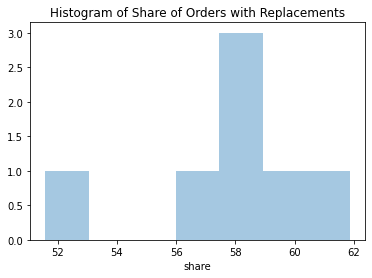

In [ ]:
sns.distplot(a=df['share'], kde=False)
plt.title("Histogram of Share of Orders with Replacements")

Text(0.5, 1.0, 'Histogram of Share of Orders with Replacements')

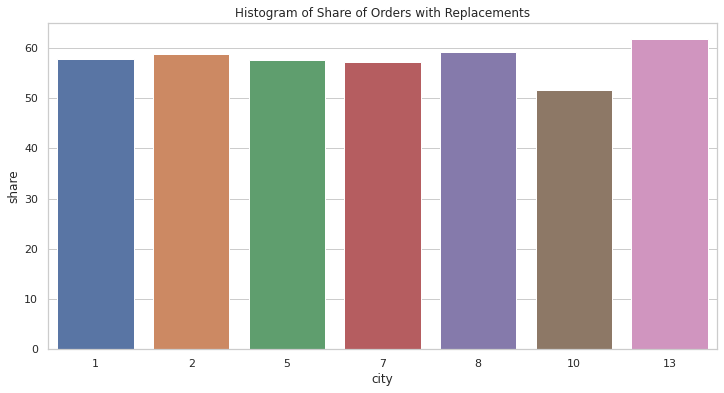

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
sns.barplot(x=df['city'],y=df['share'])
plt.title("Histogram of Share of Orders with Replacements")

In [ ]:
#доля заказов с отменами по городам

sql = """
WITH orders_per_city AS (
    SELECT 
        city,
        COUNT(o.id) as total_orders
    FROM 
        orders o 
        INNER JOIN stores s 
            ON o.store_id = s.id 
    GROUP BY city
)

SELECT 
    s.city,
    COUNT(DISTINCT c.order_id) as orders_w_cancel,
    total_orders,
    (COUNT(DISTINCT order_id)/(total_orders)::float)*100 as share
FROM 
    orders o 
    INNER JOIN cancellations c 
        ON o.id = c.order_id 
    INNER JOIN stores s 
        ON s.id = o.store_id
    INNER JOIN orders_per_city
        USING(city)
GROUP BY 
    city, 
    total_orders
ORDER BY 
    share DESC
"""
df = pd.read_sql(sql, engine)
df

,city,orders_w_cancel,total_orders,share
0,7,50760,76360,66.474594
1,8,18016,28677,62.823866
2,1,296408,478861,61.898547
3,5,17405,29386,59.228885
4,2,22986,39784,57.776996
5,10,26781,46789,57.237812
6,13,11176,20576,54.315708


Text(0.5, 1.0, 'Histogram of Share of Orders with Cancellations')

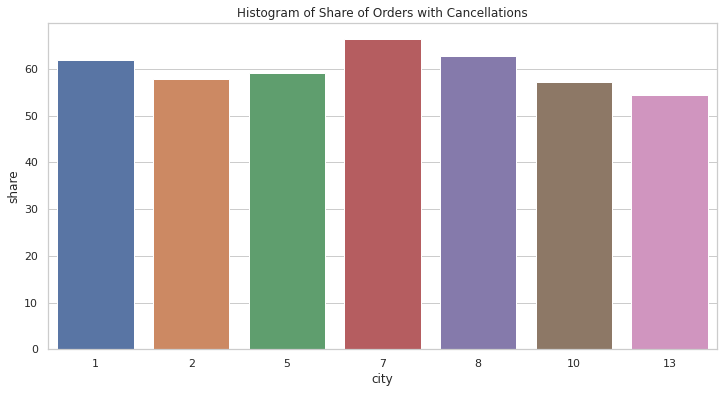

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
sns.barplot(x=df['city'],y=df['share'])
plt.title("Histogram of Share of Orders with Cancellations")

In [ ]:
#доля заказов с одновременно отменами и возвратами по городам

sql = """
WITH orders_per_city AS (
    SELECT 
        city,
        COUNT(o.id) as total_orders
    FROM 
        orders o 
        INNER JOIN stores s 
            ON o.store_id = s.id 
    GROUP BY city
)

SELECT 
    s.city,
    COUNT(DISTINCT o.id) as orders_w_cancel_n_replacement,
    total_orders,
    (COUNT(DISTINCT o.id)/(total_orders)::float)*100 as share
FROM 
    orders o 
    INNER JOIN cancellations c 
        ON o.id = c.order_id 
    INNER JOIN stores s 
        ON s.id = o.store_id
    INNER JOIN replacements r
        ON o.id = r.order_id
    INNER JOIN orders_per_city
        USING(city)
GROUP BY 
    city, 
    total_orders
ORDER BY 
    share DESC
"""
df = pd.read_sql(sql, engine)
df

,city,orders_w_cancel_n_replacement,total_orders,share
0,1,194195,478861,40.553522
1,7,30665,76360,40.158460
2,8,11215,28677,39.107996
3,13,7676,20576,37.305599
4,5,10814,29386,36.799837
5,2,14547,39784,36.564951
6,10,15005,46789,32.069504


Text(0.5, 1.0, 'Histogram of Share of Orders with Cancellations')

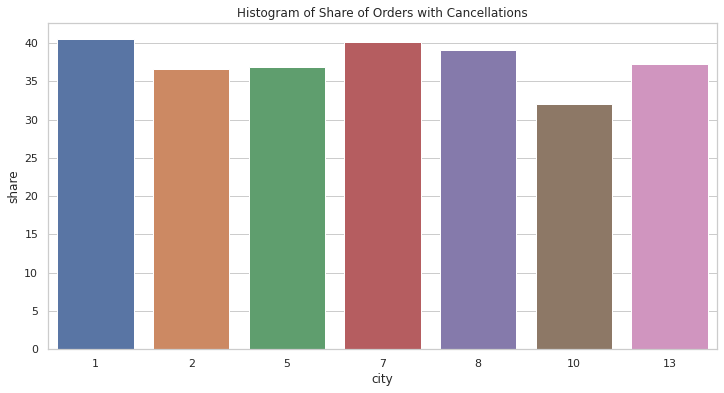

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
sns.barplot(x=df['city'],y=df['share'])
plt.title("Histogram of Share of Orders with Cancellations")

`Можно выделить 3 проблемных города - 7,8,1 - которые совокупно обеспечивают большую часть оборота, значит начать исправлять проблемы надо с них.`

- **Связь между суммой заказа и кол-вом заменяемых товаров**

In [ ]:
#связь между суммой заказа и кол-вом заменяемых товаров

sql = """
SELECT
    returned_items_count,
    SUM(CASE WHEN (item_total BETWEEN 0 AND 5000) THEN 1 ELSE 0 END) as zero_to_five_k,
    SUM(CASE WHEN (item_total BETWEEN 5001 AND 10000) THEN 1 ELSE 0 END) as five_to_ten_k,
    SUM(CASE WHEN (item_total BETWEEN 10001 AND 20000) THEN 1 ELSE 0 END) as ten_to_twenty_k,
    SUM(CASE WHEN (item_total BETWEEN 20001 AND 50000) THEN 1 ELSE 0 END) as twenty_to_fifty_k,
    SUM(CASE WHEN (item_total BETWEEN 50001 AND 100000) THEN 1 ELSE 0 END) as fifty_to_hundred,
    SUM(CASE WHEN (item_total > 100000) THEN 1 ELSE 0 END) as hundred_plus_k
FROM
    (SELECT 
        item_total,
        COUNT(item_id) as returned_items_count
    FROM
        replacements r 
        INNER JOIN orders o 
            ON o.id = r.order_id
    GROUP BY
        item_total
    ORDER BY
        item_total DESC) agg_stat
GROUP BY
    returned_items_count
ORDER BY
    1 ASC
"""
df = pd.read_sql(sql, engine) 
df

,returned_items_count,zero_to_five_k,five_to_ten_k,ten_to_twenty_k,twenty_to_fifty_k,fifty_to_hundred,hundred_plus_k
0,1,10,0,413,617,84,13
1,2,29,0,368,460,39,7
2,3,44,0,365,351,41,9
3,4,43,0,348,297,24,5
4,5,61,0,348,265,25,0
...,...,...,...,...,...,...,...
254,266,1,0,0,0,0,0
255,270,1,0,0,0,0,0
256,273,1,0,0,0,0,0
257,278,1,0,0,0,0,0


<AxesSubplot:xlabel='Returned Items Count', ylabel='Amount of Orders'>

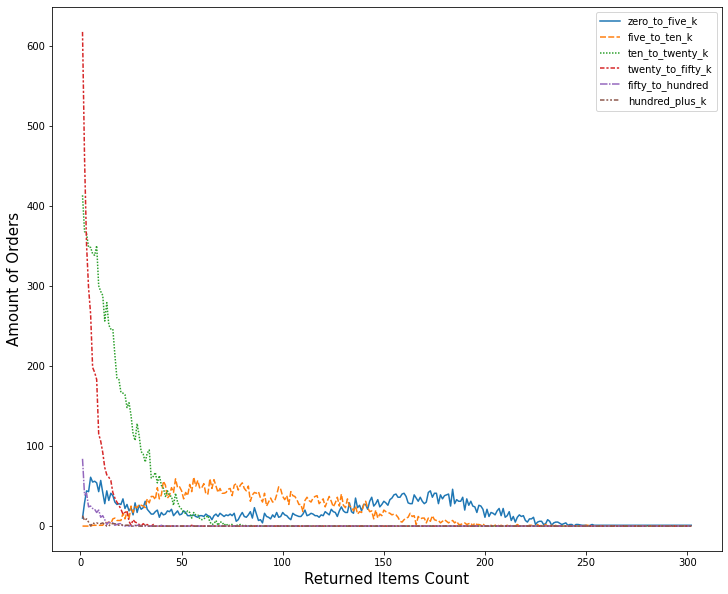

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(12,10))
plt.xlabel('Returned Items Count', size=15)
plt.ylabel('Amount of Orders', size=15)
sns.lineplot(data=df.set_index('returned_items_count'))

`Из таблицы и рисунка можно сделать вывод, что возврат 1-50 товаров чаще других происходит в выборке с чеками 10-20 тыс руб и 20-50 тыс руб. 50-200 товаров в одном заказе чаще других возвращают в выборке с чеками 5-10 тыс руб. 
провалиться в корзину и посмотреть какие товары они выбирают, какие самые часто возвращаемые товары.
гистограмма по кол-ву возвращаемых товаров`

- **Изучить влияние промокода на возвраты товаров, отмены, на сумму заказа**

In [ ]:
# зависимость наличия промокода и суммы заказа, доля возвратов, отмены товаров среди групп с промокодом и без
sql = """
SELECT
    replace_state,
    cancel_state,
    orders_w_promo,
    orders_w_no_promo,
    orders_w_promo/(SUM(orders_w_promo) OVER ())*100 as with_promo_share,
    orders_w_no_promo/(SUM(orders_w_no_promo) OVER())*100 as without_promo_share,
    avg_item_total
FROM(
    SELECT
        replace_state,
        cancel_state,
        AVG(item_total) as avg_item_total,
        SUM(CASE WHEN(promo_total <> 0) THEN 1 ELSE 0 END) orders_w_promo,
        SUM(CASE WHEN(promo_total = 0) THEN 1 ELSE 0 END) orders_w_no_promo
    FROM(
        SELECT 
            DISTINCT o.id,
            item_total,
            r.state as replace_state,
            c.state as cancel_state,
            promo_total
        FROM
            orders o
            LEFT OUTER JOIN replacements r
            ON r.order_id = o.id
            FULL OUTER JOIN cancellations c
            ON c.order_id = o.id
    ) row
    GROUP BY
        replace_state,
        cancel_state
    )agg
"""
df = pd.read_sql(sql, engine)
df

,replace_state,cancel_state,orders_w_promo,orders_w_no_promo,with_promo_share,without_promo_share,avg_item_total
0,replaced,canceled,38379,245738,39.227090,39.469960,5662.561431
1,replaced,None,15918,114658,16.269752,18.416145,4762.601282
2,None,canceled,25862,133553,26.433492,21.451024,4438.039526
3,None,None,17679,128646,18.069666,20.662871,4223.376354


`По долям, представленным в таблице, можно сделать вывод, что в примерно равных долях (39%) заказов с промокодом и без него пользователи в итоге возвращают и отменяют товар. Среди ситуаций с возвратом доля покупок без промокода выше (18%). С отменой товаров наоборот - 26% покупок с промокодом против 21% без.
Также можно заметить, что в среднем пользователи тратят больше (на 700+ рублей, 17%) в случаях, когда делают возврат или отмену, чем когда таких инцидентов не происходит. Возможно, в таких ситуациях пользователи изначально планируют вернуть магазину купленный товар, либо нетерпимы к его состоянию (дефекты итд), если товар, по мнению потребителя, обладает высокой ценой.`

- **Изучить влияние длительности доставки на отмену товаров**

In [ ]:
sql1 = """
WITH
row_stat AS(
    SELECT
        o.user_id,
        o.id,
        shipped_at,
        city,
        o.item_total,
        ends_at,
        starts_at,   
        first_value(shipped_at) OVER (PARTITION BY user_id) as first_order
    FROM
        orders o
        INNER JOIN stores s
            ON s.id = o.store_id
        INNER JOIN delivery_windows dw
            ON dw.id = o.delivery_window_id
),

orders_per_city AS (
    SELECT 
        city,
        COUNT(o.id) as total_orders
    FROM 
        orders o 
        INNER JOIN stores s 
            ON o.store_id = s.id 
    GROUP BY city
)


SELECT
    city,
    AVG(AGE(ends_at,starts_at)) as avg_delivery_time,
    (EXTRACT(EPOCH FROM AVG(AGE(ends_at,starts_at))) / 60 / 60)::float as del_in_hours,
    orders_w_cancel,
    total_orders,
    perc_w_cancel
FROM
    (SELECT 
        s.city,
        COUNT(DISTINCT c.order_id) as orders_w_cancel,
        total_orders,
        (COUNT(DISTINCT order_id)/(total_orders)::float)*100 as perc_w_cancel
    FROM 
        orders o 
        INNER JOIN cancellations c 
            ON o.id = c.order_id 
        INNER JOIN stores s 
            ON s.id = o.store_id
        INNER JOIN orders_per_city
            USING(city)
    GROUP BY 
        city, 
        total_orders
    ) as cancels
INNER JOIN row_stat
    USING(city)
GROUP BY 
    city,
    orders_w_cancel,
    total_orders,
    perc_w_cancel
ORDER BY 
    6 DESC, 3 DESC
"""

df1 = pd.read_sql(sql1, engine)

df1

,city,avg_delivery_time,del_in_hours,orders_w_cancel,total_orders,perc_w_cancel
0,7,0 days 02:01:41.927711,2.028313,50760,76360,66.474594
1,8,0 days 02:02:19.596192,2.038777,18016,28677,62.823866
2,1,0 days 02:19:55.692242,2.332137,296408,478861,61.898547
3,5,0 days 02:01:33.350575,2.025931,17405,29386,59.228885
4,2,0 days 01:51:25.572089,1.857103,22986,39784,57.776996
5,10,0 days 02:01:14.479044,2.020689,26781,46789,57.237812
6,13,0 days 02:01:17.682737,2.021579,11176,20576,54.315708


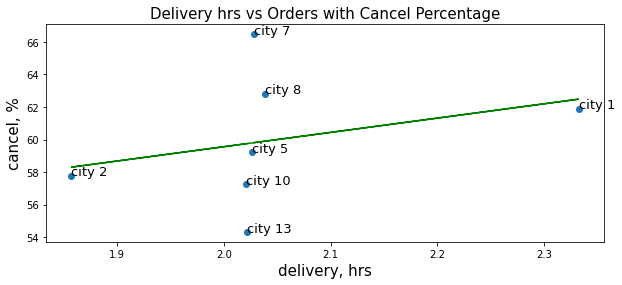

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


x = df1.iloc[:, 2].values.reshape(-1, 1) 
y = df1.iloc[:, -1].values.reshape(-1, 1)

linear_regressor = LinearRegression().fit(x, y)  
y_pred = linear_regressor.predict(x)

plt.figure(figsize=(10,4))
plt.xlabel('delivery, hrs', size=15)
plt.ylabel('cancel, %', size=15)
plt.title('Delivery hrs vs Orders with Cancel Percentage', size=15)
plt.scatter(x,y)
plt.plot(x, y_pred, color='green')

labels = [str(i) for i in df1.iloc[:, 0]]
for i, txt in enumerate(labels):
    plt.annotate(f'city {txt}', (x[i], y[i]), size=13)

plt.show()

`Благодаря графику регрессии видно, что существует положительная корреляция между длительностью доставки и процентом отказов. Из общей выборки негативно выделяются города 7 и 8, демонстрирующие высокие показатели отказов от товара.`

- **Изучить влияние длительности доставки на возврат товаров (аналогично)**

In [ ]:
sql1 = """
WITH
row_stat AS(
    SELECT
        o.user_id,
        o.id,
        shipped_at,
        city,
        o.item_total,
        ends_at,
        starts_at,   
        first_value(shipped_at) OVER (PARTITION BY user_id) as first_order
    FROM
        orders o
        INNER JOIN stores s
            ON s.id = o.store_id
        INNER JOIN delivery_windows dw
            ON dw.id = o.delivery_window_id
),

orders_per_city AS (
    SELECT 
        city,
        COUNT(o.id) as total_orders
    FROM 
        orders o 
        INNER JOIN stores s 
            ON o.store_id = s.id 
    GROUP BY city
)


SELECT
    city,
    AVG(AGE(ends_at,starts_at)) as avg_delivery_time,
    (EXTRACT(EPOCH FROM AVG(AGE(ends_at,starts_at))) / 60 / 60)::float as del_in_hours,
    orders_w_return,
    total_orders,
    perc_w_return
FROM
    (SELECT 
        s.city,
        COUNT(DISTINCT r.order_id) as orders_w_return,
        total_orders,
        (COUNT(DISTINCT order_id)/(total_orders)::float)*100 as perc_w_return
    FROM 
        replacements r 
        INNER JOIN orders o 
            ON o.id = r.order_id
        INNER JOIN stores s 
            ON o.store_id = s.id
        INNER JOIN orders_per_city 
            USING(city)
    GROUP BY 
        city, 
        total_orders
    ) as cancels
INNER JOIN row_stat
    USING(city)
GROUP BY 
    city,
    orders_w_return,
    total_orders,
    perc_w_return
ORDER BY 
    6 DESC, 3 DESC
"""

df1 = pd.read_sql(sql1, engine)

df1

,city,avg_delivery_time,del_in_hours,orders_w_return,total_orders,perc_w_return
0,13,0 days 02:01:17.682737,2.021579,12727,20576,61.853616
1,8,0 days 02:02:19.596192,2.038777,16997,28677,59.270496
2,2,0 days 01:51:25.572089,1.857103,23374,39784,58.752262
3,1,0 days 02:19:55.692242,2.332137,276842,478861,57.812601
4,5,0 days 02:01:33.350575,2.025931,16930,29386,57.612469
5,7,0 days 02:01:41.927711,2.028313,43684,76360,57.207962
6,10,0 days 02:01:14.479044,2.020689,24139,46789,51.591186


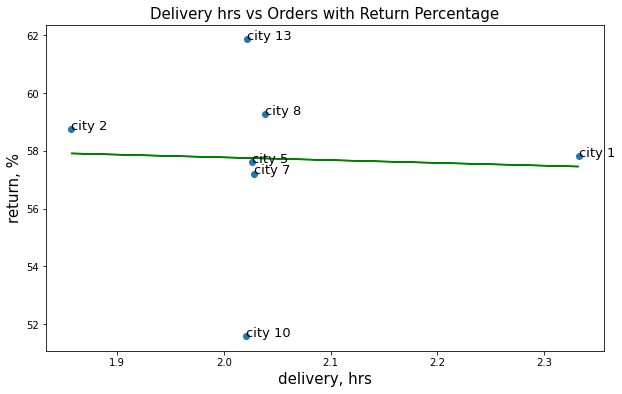

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


x = df1.iloc[:, 2].values.reshape(-1, 1) 
y = df1.iloc[:, -1].values.reshape(-1, 1)

linear_regressor = LinearRegression().fit(x, y)  
y_pred = linear_regressor.predict(x)

plt.figure(figsize=(10,6))
plt.xlabel('delivery, hrs', size=15)
plt.ylabel('return, %', size=15)
plt.title('Delivery hrs vs Orders with Return Percentage', size=15)
plt.scatter(x,y)
plt.plot(x, y_pred, color='green')

labels = [str(i) for i in df1.iloc[:, 0]]
for i, txt in enumerate(labels):
    plt.annotate(f'city {txt}', (x[i], y[i]), size=13)

plt.show()

`Благодаря графику видно, что связь между процентом заказов с возвратами и длительностью доставки отсутствует.`

- **Изучить влияние длительности доставки на сумму след заказов среди тех, кто совершил хотя бы 1 повторный заказ**

In [ ]:
sql1 = """
WITH
row_stat AS(
    SELECT
        o.user_id,
        o.id,
        shipped_at,
        city,
        o.item_total,
        ends_at,
        starts_at,   
        first_value(shipped_at) OVER (PARTITION BY user_id) as first_order
    FROM
        orders o
        INNER JOIN stores s
            ON s.id = o.store_id
        INNER JOIN delivery_windows dw
            ON dw.id = o.delivery_window_id
)

SELECT
   city,
   AVG(item_total) as avg_check_first_order,
   AVG(AGE(ends_at,starts_at)) as avg_delivery_time
FROM(
    SELECT
        COUNT(*) OVER (PARTITION BY user_id) as orders_count ,
        first_order,
        item_total, 
        city,
        shipped_at,
        ends_at,
        starts_at
    FROM
        row_stat
    ) users_w_next_orders
WHERE
    shipped_at = first_order
GROUP BY
    city
ORDER BY 
    city
"""

sql2 = """
WITH
row_stat AS(
    SELECT
        o.user_id,
        o.id,
        shipped_at,
        city,
        o.item_total,
        ends_at,
        starts_at,   
        first_value(shipped_at) OVER (PARTITION BY user_id) as first_order
    FROM
        orders o
        INNER JOIN stores s
            ON s.id = o.store_id
        INNER JOIN delivery_windows dw
            ON dw.id = o.delivery_window_id
)
SELECT
   city,
   AVG(item_total) as avg_check_wo_first_order
FROM(
    SELECT
        item_total, 
        city
    FROM
        row_stat
    WHERE 
        shipped_at > first_order
    ) next_orders
GROUP BY
    city
ORDER BY 
    city
"""

df1 = pd.read_sql(sql1, engine).set_index('city')
df2 = pd.read_sql(sql2, engine).set_index('city')

res = pd.concat([df1,df2],axis=1).reset_index()
res.sort_values(by=['avg_check_wo_first_order'], ascending=False)

,city,avg_check_first_order,avg_delivery_time,avg_check_wo_first_order
0,1,5021.828862,0 days 02:21:18.881906,5862.447034
2,5,3379.859098,0 days 02:00:57.324841,4369.691078
1,2,3323.005692,0 days 01:52:15.960804,4257.853836
4,8,3497.796656,0 days 02:02:12.871253,4170.339616
5,10,3503.253478,0 days 02:01:25.077187,4064.233527
6,13,3351.842547,0 days 02:01:03.300919,4041.640307
3,7,3282.567474,0 days 02:01:45.273806,3875.129722


`Средний чек по всем городам вырос, значит люди, совершившие минимум 1 повторную покупку, стали оставлять в сервисе больше денег. Значит, негативной связи между средним чеком и длительностью доставки нет. Возможно, рост чека связан с тем, что в сервисе остаются именно "фанаты", готовые заказывать товары на большую сумму.` 

- **Средние чеки на пользователя по городам. Влияние длительности доставки на отток клиентов**

In [ ]:
sql1 = """
WITH
row_stat AS(
    SELECT
        o.user_id,
        o.id,
        shipped_at,
        city,
        o.item_total,
        ends_at,
        starts_at,   
        first_value(shipped_at) OVER (PARTITION BY user_id) as first_order
    FROM
        orders o
        INNER JOIN stores s
            ON s.id = o.store_id
        INNER JOIN delivery_windows dw
            ON dw.id = o.delivery_window_id
),
cte AS (
    SELECT
        user_id,
        city,
        MAX(CASE WHEN(shipped_at > first_order) THEN 1 ELSE 0 END) as retention_flag
    FROM
        row_stat
    GROUP BY
        user_id,
        city
)

SELECT
    city,
    (SUM(retention_flag)/COUNT(DISTINCT user_id)::float)*100 as retention_rate,
    100 - (SUM(retention_flag)/COUNT(DISTINCT user_id)::float)*100 as churn_rate
FROM
    cte
GROUP BY
    city 
ORDER BY city
"""

sql2 = """
WITH
row_stat AS(
    SELECT
        o.user_id,
        o.id,
        shipped_at,
        city,
        o.item_total,
        ends_at,
        starts_at,   
        first_value(shipped_at) OVER (PARTITION BY user_id) as first_order
    FROM
        orders o
        INNER JOIN stores s
            ON s.id = o.store_id
        INNER JOIN delivery_windows dw
            ON dw.id = o.delivery_window_id
)

SELECT
    city,
    AVG(item_total) avg_item_total,
    AVG(AGE(ends_at,starts_at)) as avg_delivery_time,
    SUM(item_total)/(SELECT SUM(item_total) FROM orders)::float*100 as sales_share
FROM
    row_stat
GROUP BY
    city
ORDER BY city
"""

df1 = pd.read_sql(sql1, engine).set_index('city')
df2 = pd.read_sql(sql2, engine).set_index('city')

res = pd.concat([df2,df1],axis=1).reset_index()
res.sort_values(by=['sales_share', 'avg_item_total'], ascending=False)

,city,avg_item_total,avg_delivery_time,sales_share,retention_rate,churn_rate
0,1,5500.421648,0 days 02:19:55.692242,74.065717,33.525933,66.474067
3,7,3689.266566,0 days 02:01:41.927711,7.921754,42.481324,57.518676
5,10,3875.444613,0 days 02:01:14.479044,5.098949,40.768842,59.231158
1,2,3911.333978,0 days 01:51:25.572089,4.375712,33.732435,66.267565
2,5,3915.848159,0 days 02:01:33.350575,3.235800,33.741753,66.258247
4,8,3871.219688,0 days 02:02:19.596192,3.121742,35.422414,64.577586
6,13,3767.313715,0 days 02:01:17.682737,2.179757,37.663886,62.336114


`Поле churn_rate оценивает, сколько клиентов уходит из сервиса после первого заказа. Самая продолжительная доставка и один из самых высоких показателей оттока клиентов находится в городе 1, который формирует 74% оборота, что негативно сказывает на перспективах роста бизнеса. Могу предположить, что длительнолсть доставки связана с напряженным трафиком, нехваткой рабочей силы, а возможно с отсутствием крупных магазинов рядом с потенцальными клиентами.
Возможно, пользователи уходят из сервиса к конкурентам, зная, что у тех доставка совершается быстрее.`

`Можно построить линейную диаграмму, чтобы отследить динамику изменения длительности доставки, а также динамику оттока пользователей. Если зависимость будет пропорциональна, можно допустить, что между параметрами есть связь`